## Import Libraries

In [30]:
# pip3 install -U scikit-learn scipy matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.svm import SVC
from io import StringIO
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

### Import Dataset

In [31]:
hospitals_df = pd.read_csv("hospitals_infections.csv")
hospitals_df.head()
# hospitals_df.info()

,provider_id,hospital_ownership,emergency_services,cpcd,pecd,hsbp,readmission,c_diff_compared
0,40055,Proprietary,Yes,95.00,33,1.07,16,Better than the U.S. National Benchmark
1,40062,Voluntary non-profit - Private,Yes,46.67,32,1.04,14,Better than the U.S. National Benchmark
2,40084,Voluntary non-profit - Private,Yes,46.36,65,0.93,18,Better than the U.S. National Benchmark
3,40134,Proprietary,Yes,95.83,83,0.90,16,Better than the U.S. National Benchmark
4,50022,Government - State,Yes,71.67,14,1.05,16,Worse than the U.S. National Benchmark


### Processing Dataset

In [32]:
hospitals_df['c_diff_compared'].unique()

array(['Better than the U.S. National Benchmark',
       'Worse than the U.S. National Benchmark'], dtype=object)

In [33]:
hospitals_df['emergency_services'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
hospitals_df['c_diff_compared'] = hospitals_df['c_diff_compared'].replace({'Worse than the U.S. National Benchmark': 0, 'Better than the U.S. National Benchmark': 1})
hospitals_df['emergency_services'] = hospitals_df['emergency_services'].replace({'No': 0, 'Yes': 1})
hospitals_df.head()

,provider_id,hospital_ownership,emergency_services,cpcd,pecd,hsbp,readmission,c_diff_compared
0,40055,Proprietary,1,95.00,33,1.07,16,1
1,40062,Voluntary non-profit - Private,1,46.67,32,1.04,14,1
2,40084,Voluntary non-profit - Private,1,46.36,65,0.93,18,1
3,40134,Proprietary,1,95.83,83,0.90,16,1
4,50022,Government - State,1,71.67,14,1.05,16,0


### Split the Dataset

In [35]:
list_features = ['emergency_services', 'cpcd', 'pecd', 'hsbp', 'readmission']
x = hospitals_df[list_features]
y = hospitals_df['c_diff_compared']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=7)

### Investigate a supervised learning classifier (not reviewed in lectures). It can be an algorithm your group will use in the final project.
### Train the Model with SVM

In [36]:
model = svm.SVC(C=0.8, kernel='linear', gamma=20, decision_function_shape='ovr')
model.fit(x_train, y_train)

SVC(C=0.8, gamma=20, kernel='linear')

### Prediction and Evaluation

In [37]:
y_pred = model.predict(x_test)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(model.score(x_train, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(model.score(x_test, y_test)))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy of the svm classifier on training data is 0.66 out of 1
The accuracy of the svm classifier on test data is 0.74 out of 1
0.7381974248927039
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.74      1.00      0.85       172

    accuracy                           0.74       233
   macro avg       0.37      0.50      0.42       233
weighted avg       0.54      0.74      0.63       233



### Construct a model in either R or Python to investigate the relationship between US acute-care hospital characteristics and Clostridium difficile infections (CDI). Use the dataset hospitals_infections.csv. 

### Train the Model with Decision Tree

In [38]:
model = DecisionTreeClassifier()
encode_train = pd.get_dummies(x_train, drop_first=True)
model.fit(encode_train, y_train)

DecisionTreeClassifier()

### Visualization of Decision Tree

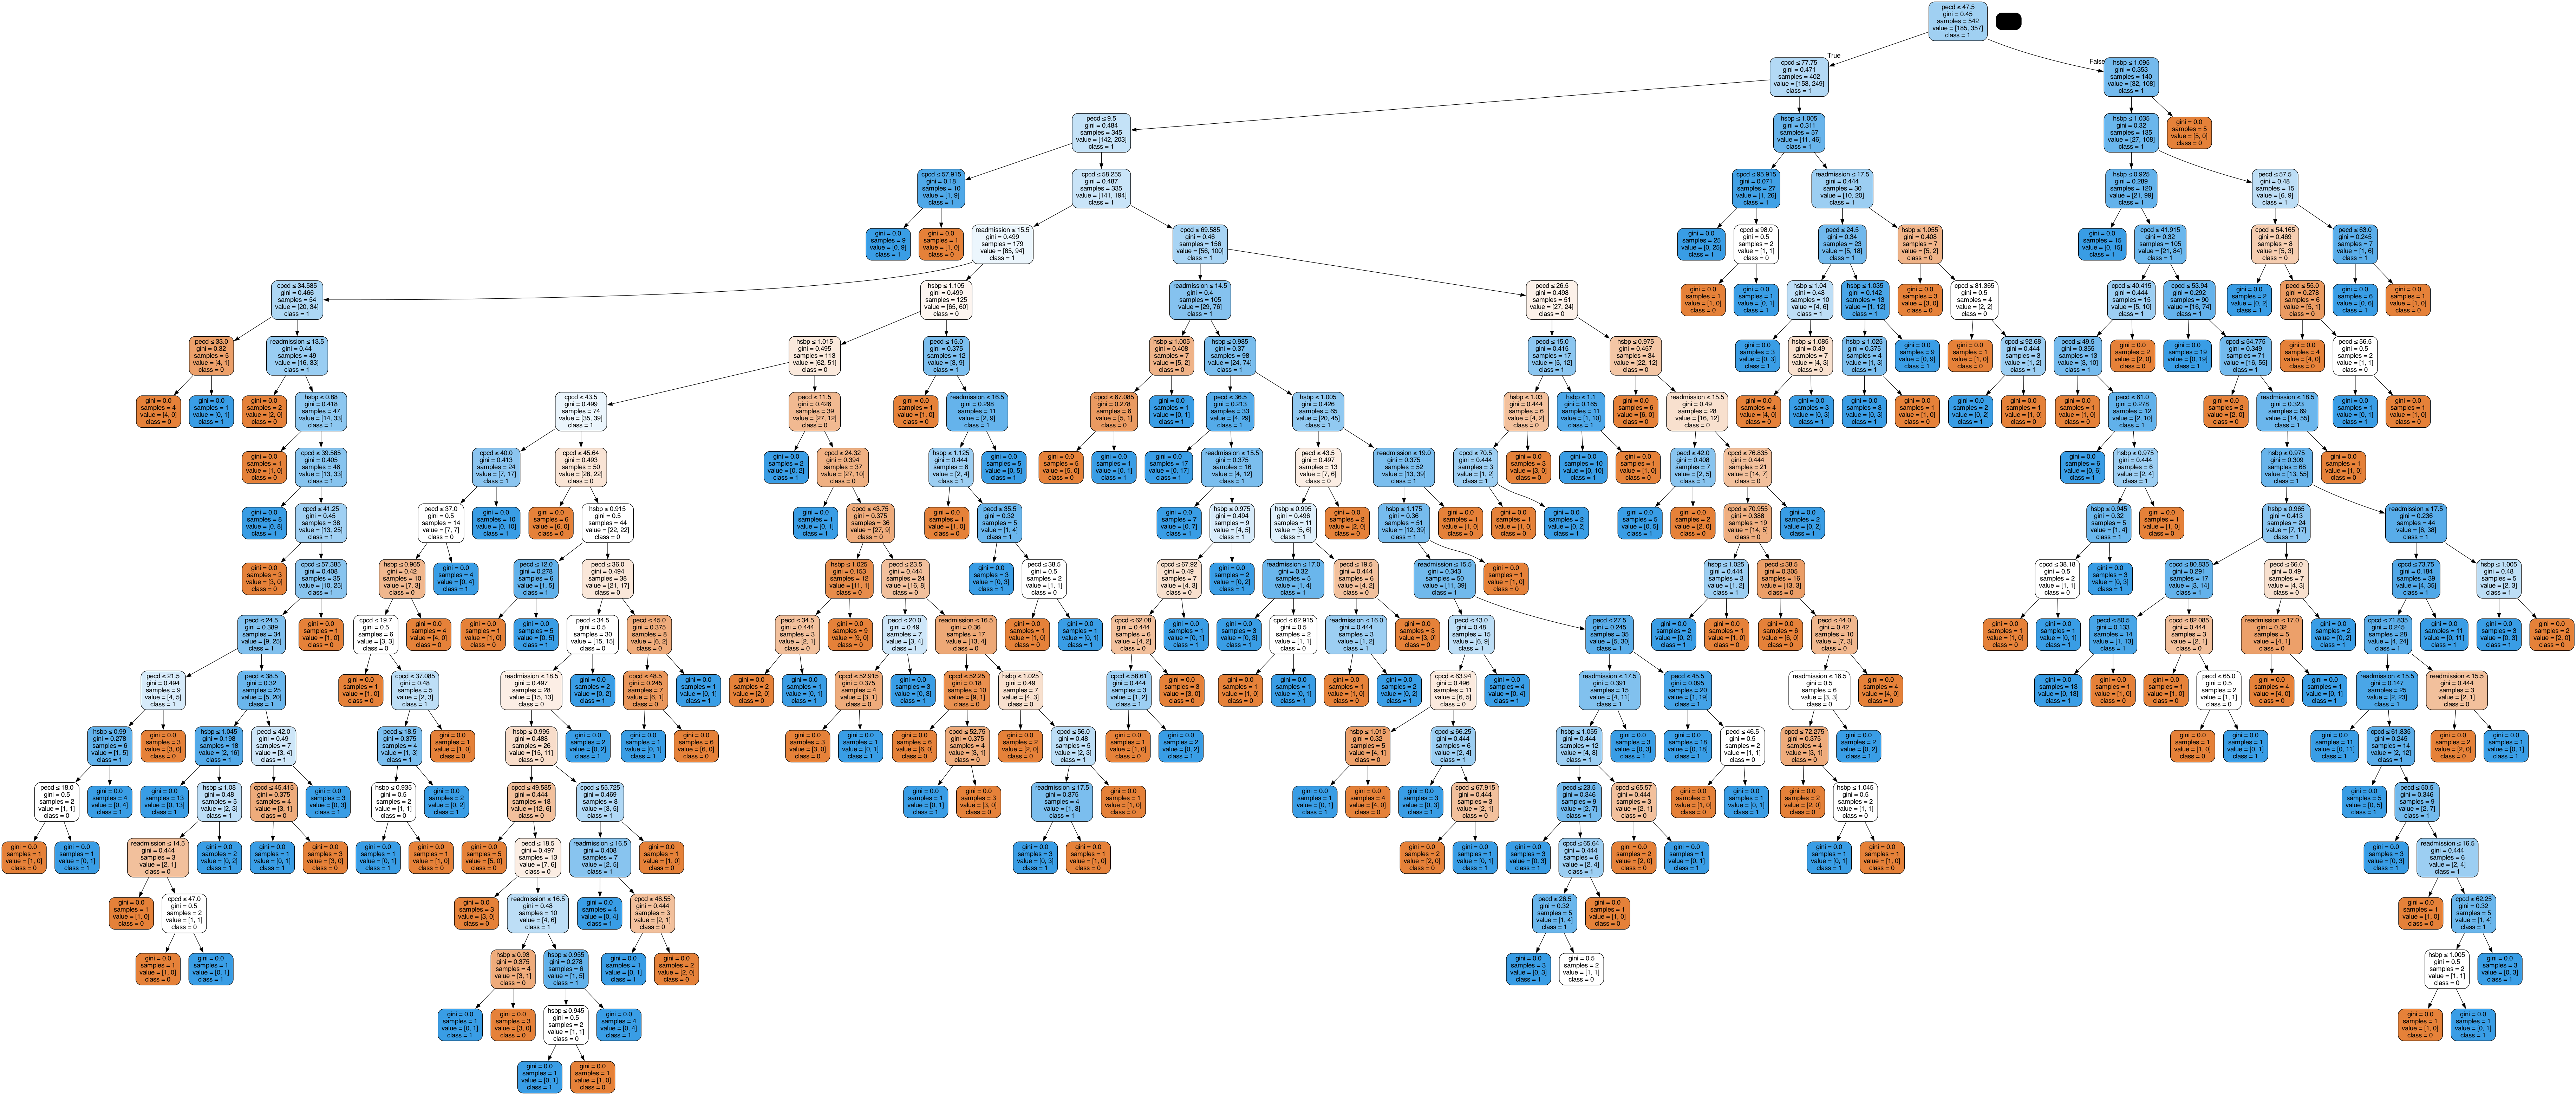

In [39]:
encode_list = ['emergency_services','cpcd', 'pecd', 'hsbp', 'readmission']
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters= True, 
                feature_names = encode_list, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Prediction and Evaluation

In [45]:
y_pred = model.predict(x_test)
print('The accuracy on training data is ', model.score(x_train, y_train))
print('The accuracy on test data is ')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy on training data is  0.9981549815498155
The accuracy on test data is 
0.6223175965665236
              precision    recall  f1-score   support

           0       0.32      0.39      0.35        61
           1       0.77      0.70      0.73       172

    accuracy                           0.62       233
   macro avg       0.54      0.55      0.54       233
weighted avg       0.65      0.62      0.63       233

